In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

data = pd.read_csv("Data for Associate DS.csv")

In [2]:
data.shape


(8950, 18)

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Dealing the missing data 

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['MINIMUM_PAYMENTS'].mean())
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs:

#### Monthly average purchase

In [6]:
data['Average_Monthly_Purchase']=data['PURCHASES']/data['TENURE']
data['Average_Monthly_Purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Average_Monthly_Purchase, dtype: float64

#### Monthly cash advance

In [7]:
data['Monthly_CashAdvance']=data['CASH_ADVANCE']/data['TENURE']
data['Monthly_CashAdvance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_CashAdvance, dtype: float64

#### Purchases by type (one-off, installments)

In [8]:
def purchase_type(data):
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'None'
    if (data['ONEOFF_PURCHASES']==0) & (data['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENTS_PURCHASE'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']>0):
         return 'Both'
    if (data['ONEOFF_PURCHASES']>0) & (data['INSTALLMENTS_PURCHASES']==0):
        return 'ONEOFF_PURCHASE'
    
data['purchase_type']=data.apply(purchase_type,axis=1)

In [9]:
data['purchase_type'].value_counts()

Both                     2774
INSTALLMENTS_PURCHASE    2260
None                     2042
ONEOFF_PURCHASE          1874
Name: purchase_type, dtype: int64

#### Average amount per purchase and cash advance transaction,

In [10]:
data['AVG_AMT_PER_PURCHASE']=data['PURCHASES']/data['PURCHASES_TRX']
data['AVG_AMT_PER_PURCHASE'].head()

0      47.700000
1            NaN
2      64.430833
3    1499.000000
4      16.000000
Name: AVG_AMT_PER_PURCHASE, dtype: float64

In [11]:
data['AVG_CASH_ADVANCE_PER_PURCHASE']=data['CASH_ADVANCE']/data['CASH_ADVANCE_TRX']
data['AVG_CASH_ADVANCE_PER_PURCHASE'].head()

0            NaN
1    1610.736371
2            NaN
3     205.788017
4            NaN
Name: AVG_CASH_ADVANCE_PER_PURCHASE, dtype: float64

#### Limit Usage

In [12]:
data['Limit_Usage']=data['BALANCE']/data['CREDIT_LIMIT']
data['Limit_Usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: Limit_Usage, dtype: float64

#### Payments to minimum payments ratio

In [13]:
data['PtoMP']=data['PAYMENTS']/data['MINIMUM_PAYMENTS']
data['PtoMP'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: PtoMP, dtype: float64

#### Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.


Text(0.5, 1.0, 'average monthly cash advance by different Purchase type ')

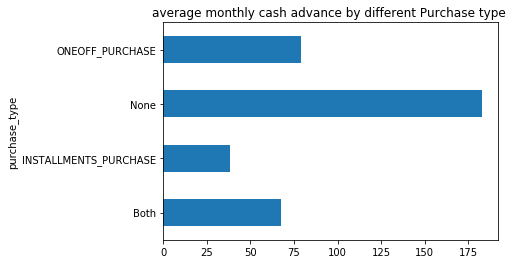

In [14]:
x = data.groupby('purchase_type')['Monthly_CashAdvance'].mean()
x.plot.barh()
plt.title('average monthly cash advance by different Purchase type ')

##### customers which take installment purchases have least monthly cash advance whereas customers who don't take either oneoff or installments take most cash advance.

Text(0.5, 1.0, 'average limit usagage of different Purchase type ')

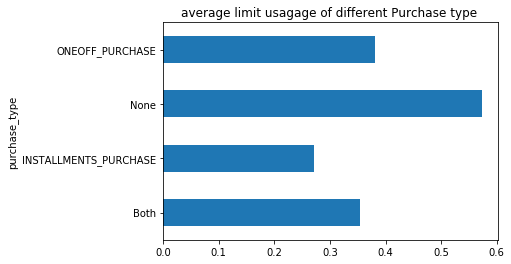

In [15]:
x = data.groupby('purchase_type')['Limit_Usage'].mean()
x.plot.barh()
plt.title('average limit usagage of different Purchase type ')

#### customers which take installment purchases have least limit usage whereas customers who don't take either oneoff or installments have greater limit usage. 

Text(0.5, 1.0, 'average payment to min payment of different Purchase type ')

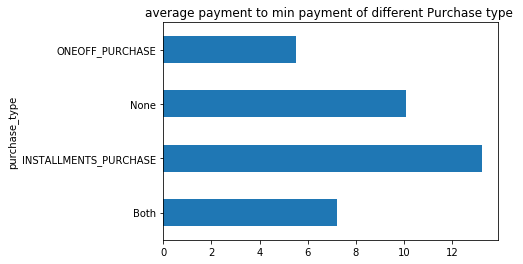

In [16]:
x = data.groupby('purchase_type')['PtoMP'].mean()
x.plot.barh()
plt.title('average payment to min payment of different Purchase type ')

##### customers paying installments have greater payment to min payment ratio

### Identification of the relationships/ affinities between services.

In [17]:
corelation = data.corr()
corelation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Average_Monthly_Purchase,Monthly_CashAdvance,AVG_AMT_PER_PURCHASE,AVG_CASH_ADVANCE_PER_PURCHASE,Limit_Usage,PtoMP
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,0.322802,0.394282,-0.318959,0.072692,0.179711,0.475431,0.044953,0.123739,0.503556,-0.039302
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,0.065008,0.114249,-0.095082,0.119776,0.131281,0.086020,-0.091833,-0.151270,0.404650,-0.088628
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.603264,0.093515,0.180379,0.086288,0.995845,-0.055473,0.216188,-0.002055,-0.057411,0.016721
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.567292,0.048597,0.132763,0.064150,0.913060,-0.034545,0.238748,-0.007964,-0.042214,0.010249
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.384084,0.131687,0.182569,0.086143,0.677024,-0.067782,0.065930,0.009789,-0.058266,0.020694
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,0.453238,0.139223,-0.152935,-0.068312,-0.047502,0.976364,0.020150,0.362811,0.215199,-0.003291
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.103464,0.002976,0.305802,0.061506,0.395337,-0.215786,-0.250120,-0.054391,-0.201788,0.011536
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.243537,-0.029963,0.157531,0.082466,0.499711,-0.089034,-0.015402,-0.053703,-0.092010,-0.004466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.085551,0.029590,0.250087,0.073275,0.314136,-0.179333,-0.239631,-0.043198,-0.161424,0.018024
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,0.183192,0.097898,-0.249773,-0.133372,-0.116109,0.628312,-0.020530,-0.161860,0.360133,-0.021741


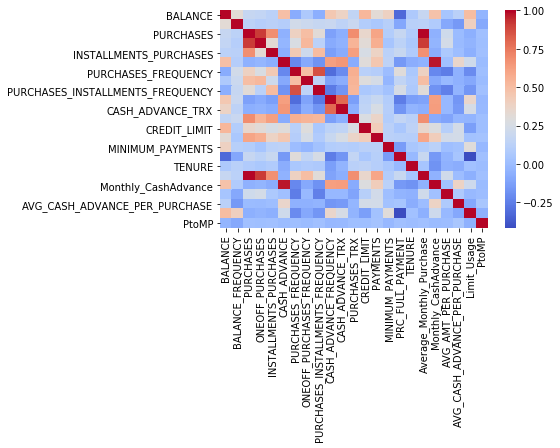

In [18]:
sns.heatmap(corelation,cmap='coolwarm')

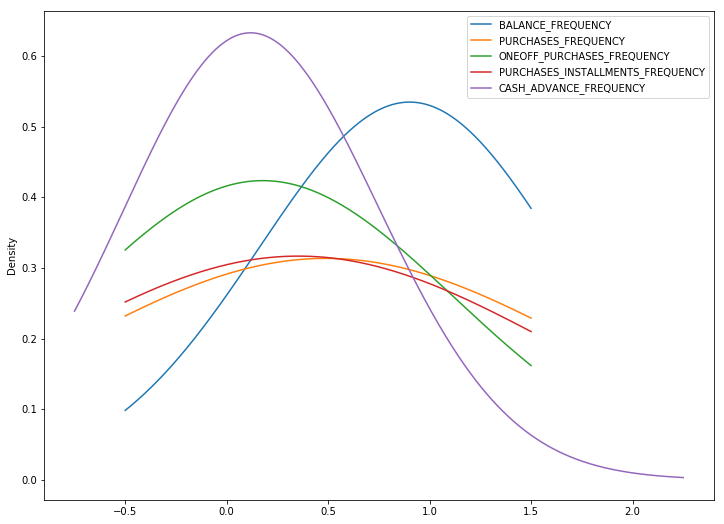

In [19]:
ax = data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY']].plot.kde(figsize=(12,9), bw_method=3)

### Clustering

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset = pd.read_csv("Data for Associate DS.csv")
dataset = dataset.drop(['CUST_ID'], axis =1)
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean())
dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(dataset['MINIMUM_PAYMENTS'].mean())
dataset = scaler.fit_transform(dataset)

#datset.shape


In [21]:
from sklearn.decomposition import PCA
pc=PCA(n_components=17)
pca1=pc.fit(dataset)
sum(pca1.explained_variance_ratio_)

1.0000000000000002

In [22]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    pca1=pc.fit(dataset)
    var_ratio[n]=sum(pca1.explained_variance_ratio_)

In [23]:
var_ratio

{2: 0.4759273904123887,
 3: 0.5638442879830535,
 4: 0.6386470293615863,
 5: 0.7012736050832553,
 6: 0.7587884695179349,
 7: 0.8076493096304153,
 8: 0.8502176858015407,
 9: 0.8885067658718925,
 10: 0.9193060381691535,
 11: 0.943024919343588,
 12: 0.960761188496962,
 13: 0.9750252164309634,
 14: 0.9871990535858006,
 15: 0.9973289484227209,
 16: 0.9999993147765223,
 17: 1.0000000000000002}

#### 9 components explaning us 90% thus 6 components will be chosen

In [24]:
pc=PCA(n_components=6)

p=pc.fit(dataset)
dataset.shape
p.explained_variance_
np.sum(p.explained_variance_)

12.90084541704702

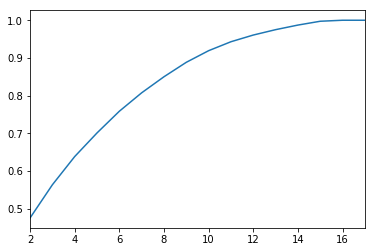

In [25]:
pd.Series(var_ratio).plot()

In [26]:
pc_final=PCA(n_components=6).fit(dataset)

reduced_cr=pc_final.fit_transform(dataset)

In [27]:
dataset1=pd.DataFrame(reduced_cr)
dataset1.head()

,0,1,2,3,4,5
0,-1.682258,-1.076311,0.488636,0.665487,0.018643,0.051391
1,-1.138108,2.506575,0.601141,-0.120013,0.605483,-1.137334
2,0.969743,-0.383514,0.102137,1.209650,-2.173230,-0.217338
3,-0.873566,0.043211,1.459863,1.152285,0.295452,-0.124076
4,-1.599441,-0.688425,0.365264,0.990167,-0.486613,0.076025


In [28]:
dataset=pd.DataFrame(dataset)
dataset.shape

(8950, 17)

In [29]:
col_list = dataset.columns
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(6)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
0,0.101097,0.403954,-0.160096,0.283422,0.047538,0.039881
1,0.120064,0.130560,-0.420569,0.149721,-0.484522,0.035563
2,0.411633,0.041005,0.257957,0.039025,0.031441,0.176438
3,0.346400,0.062843,0.392180,0.078084,-0.155687,0.184778
4,0.336806,-0.018557,-0.110480,-0.051203,0.360339,0.077703
5,-0.023324,0.439242,-0.027314,-0.254567,0.096647,-0.146825
6,0.321484,-0.190791,-0.374702,-0.188967,-0.092536,-0.037320
7,0.294629,-0.017942,0.115153,0.027479,-0.531604,0.024819
8,0.274701,-0.178610,-0.473428,-0.215015,0.180131,-0.052463
9,-0.089122,0.434084,-0.109012,-0.264279,-0.137350,0.066021


In [30]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

PC_0    0.272906
PC_1    0.203021
PC_2    0.087917
PC_3    0.074803
PC_4    0.062627
PC_5    0.057515
dtype: float64

##### ELBOW METHOD FOR OPTIMUM NUMBER  OF CLUSTERS

In [31]:
from sklearn.cluster import KMeans
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(dataset1)
    wcss.append(kmeans.inertia_)


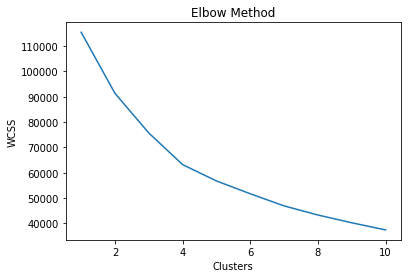

In [32]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

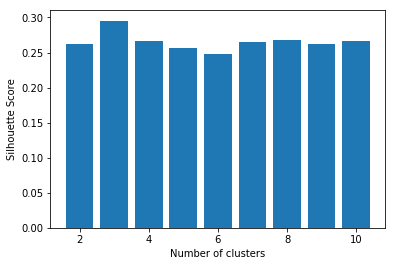

In [33]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(dataset1, KMeans(n_clusters = n_cluster).fit_predict(dataset1))) 
    
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [34]:
km = KMeans(n_clusters=4,random_state=123)
km.fit(dataset1)
km.labels_
pd.Series(km.labels_).value_counts()

1    4066
0    3294
3    1223
2     367
dtype: int64

In [35]:
km.labels_

array([1, 3, 0, ..., 0, 1, 1])

In [36]:
data["CLUSTER"] = km.labels_

In [37]:
collist=['Average_Monthly_Purchase','Monthly_CashAdvance','AVG_AMT_PER_PURCHASE','Limit_Usage','PtoMP','CREDIT_LIMIT','PURCHASES_TRX']
clus=data.groupby('CLUSTER')\
.apply(lambda x: x[collist].mean()).T
clus

CLUSTER,0,1,2,3
Average_Monthly_Purchase,110.962764,25.409085,682.994486,42.341894
Monthly_CashAdvance,18.974839,52.641380,63.586059,405.947588
AVG_AMT_PER_PURCHASE,inf,inf,162.255474,95.473820
Limit_Usage,0.285306,0.397528,0.388046,0.639380
PtoMP,9.064901,9.749774,14.438780,4.964744
CREDIT_LIMIT,4254.924181,3314.957585,10022.752044,7399.022523
PURCHASES_TRX,23.393139,3.135022,89.373297,7.399019


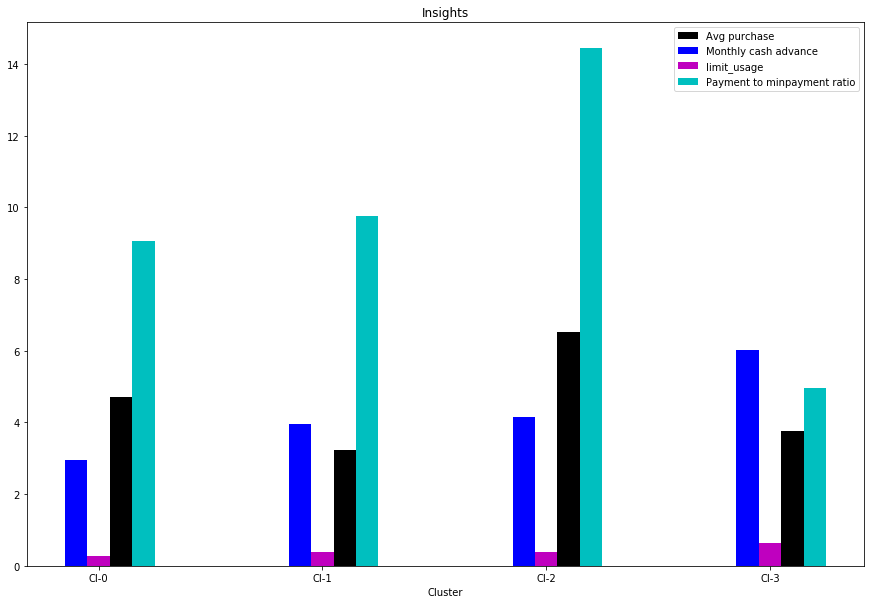

In [40]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(clus.columns))

purchase= np.log(clus.loc['Average_Monthly_Purchase',:].values)
cash_advance=np.log(clus.loc['Monthly_CashAdvance',:].values)
limit_usage=(clus.loc['Limit_Usage',:].values)
payment=clus.loc['PtoMP',:].values

bar_width=.10
b1=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b2=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b3=plt.bar(index+bar_width,limit_usage,color='m',label='limit_usage',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment to minpayment ratio',width=bar_width)


plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

#### cluster 2 has highest monthly average purchases and payment to min payment ratio
#### cluster 3 has highest monthly cash advance and limit_usage
#### cluster 0  has the lowest limit usage

## statergy

### cluster 2 has most purchases and also has highest payment to minimum payment ratio. They also have a decent limit usage.Thus can be termed as loyal customers and needs to be retained. This cluster can be targeted by introducing loyality programs or  by awarding cashbacks for each transaction to promote more purchases.

### cluster 0 has the lowest limit usage. Thus to target this section we can provide more credit limit to this section with lower interest.

### cluster 3 has the highest monthly cash advance and also high limit usage. These are not the best type of customers a company would want. But to target this section offering lower interest rate can be an option. 

### cluster 1 has lowest avg purchases but decent limit usage and a good payment to min payment ratio. This cluster is around 45% of whole userbase. To promote transaction rewards and casbacks should be introduced.